<a href="https://colab.research.google.com/github/dsaint31x/OpenCV_Python_Tutorial/blob/master/DIP/DIP_distortion_barrrel_pincushion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

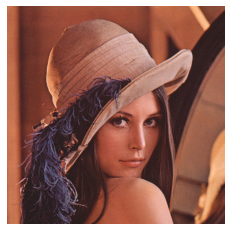

In [2]:
import requests

url = 'https://raw.githubusercontent.com/dsaint31x/OpenCV_Python_Tutorial/master/images/lena.png'
barray = bytearray(requests.get(url).content)
ndarray = np.asarray(barray, dtype=np.uint8)
img = cv2.imdecode(ndarray, cv2.IMREAD_COLOR)
img = img[...,::-1]
plt.imshow(img)
plt.axis('off')
plt.show()

In [3]:
# img = cv2.imread('Lenna.png')
rows, cols = img.shape[:2]
print(rows, cols)

512 512


In [4]:

def radial_distortion (img, alpha = -.1) : # barrel
  rows, cols = img.shape[:2]
  mapy, mapx = np.indices( (rows,cols), dtype=np.float32)
  mapx = mapx / (cols -1) *2 -1
  mapy = mapy / (rows -1) *2 -1
  r, theta = cv2.cartToPolar(mapx, mapy)


  rd = r * (1 - alpha*(r**2))

  mapx, mapy = cv2.polarToCart(rd, theta)
  mapx = (mapx +1)/2 * (cols-1)
  mapy = (mapy +1)/2 * (rows-1)
  img_d = cv2.remap(img, mapx, mapy, cv2.INTER_LANCZOS4)
  return img_d

In [5]:
def radial_distortion_recover (img, alpha = -.1) : # barrel
  rows, cols = img.shape[:2]
  mapy, mapx = np.indices( (rows,cols), dtype=np.float32)
  mapx = mapx / (cols -1) *2 -1
  mapy = mapy / (rows -1) *2 -1
  r, theta = cv2.cartToPolar(mapx, mapy)

  ru = r / (1 - alpha*(r**2))

  mapx, mapy = cv2.polarToCart(ru, theta)
  mapx = (mapx +1)/2 * (cols-1)
  mapy = (mapy +1)/2 * (rows-1)
  img_u = cv2.remap(img, mapx, mapy, cv2.INTER_LANCZOS4)
  return img_u

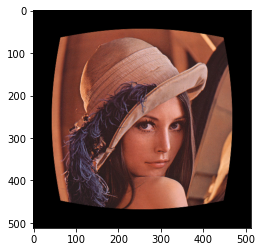

In [7]:
img_d = radial_distortion(img,-0.3)
plt.imshow(img_d)

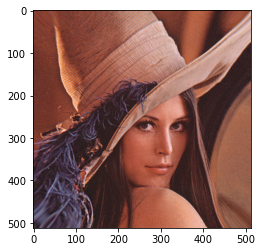

In [9]:
img_d = radial_distortion(img, alpha=0.2)
plt.imshow(img_d)

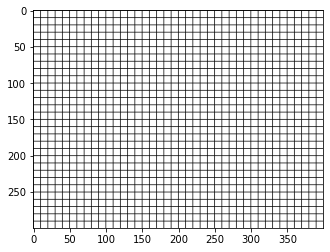

In [10]:
img = np.full( (300,400,3), 255, np.uint8)
img[::10, : ,: ] = 0
img[:, ::10 ,: ] = 0

plt.imshow(img[...,::-1])

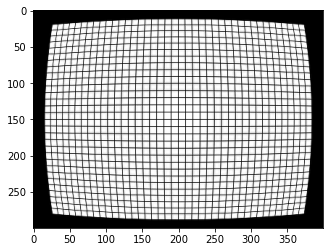

In [11]:
img_d = radial_distortion(img)
plt.imshow(img_d[...,::-1])

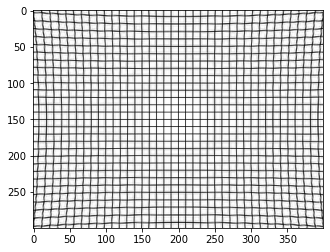

In [12]:
img_u = radial_distortion_recover(img_d, alpha=-0.1)
plt.imshow(img_u[...,::-1])

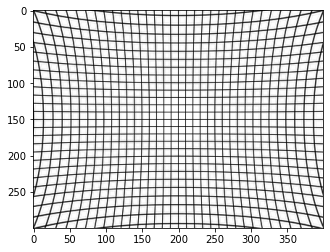

In [13]:
img_d = radial_distortion(img, alpha=0.1)
plt.imshow(img_d[...,::-1])

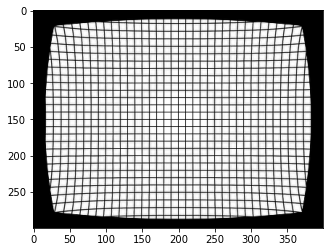

In [14]:
img_u = radial_distortion_recover(img_d, alpha=0.1)
plt.imshow(img_u[...,::-1])